## Poisson Distribution

- Using scipy to compute poisson probs
- Football data case study

In [13]:
import scipy

1. Given a manuscript, where there are on an average 3 errors in a given page. What are the chances of finding exactly 4 errors?

In [14]:
scipy.stats.poisson.pmf(4,3)

0.16803135574154085

2. Given a manuscript, where there are on an average 3 errors in a given page. What are the chances of finding upto 4 errors in a page?

In [15]:
scipy.stats.poisson.cdf(4,3)

0.8152632445237722

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/Gunnvant/Self-Paced-Content/main/python/live_sessions/stats_decision_making/notebooks/football_results.csv"
df = pd.read_csv(url)

In [2]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**DIY:**

How many matches were in a neutral venue?

**DIY:**

Select rows in the DataFrame where the venue was neutral

**DIY:**

Add a new column to the DataFrame which contains the total number of goals scored in *EACH MATCH*

**DIY:**

Find the number of matches in which 5 goals were scored

**Class Discussion**

Create a dictionary where the keys are the number of goals, and the values are the number of matches in which that many goals were scored.

Ex: dict_ex = {3:5, 4:10} for a dataset in which 3 goals were scored in 5 matches and 4 goals were scored in 10 matches.

In [3]:
df["total_goals"]=df["home_score"] + df["away_score"]

max_goals = df["total_goals"].max()
print(max_goals)

31


In [5]:
dict_goals = {}
for i in range(max_goals+1):
    dict_goals[i] = len(df[df["total_goals"] == i])

In [6]:
dict_goals

{0: 3623,
 1: 7707,
 2: 9915,
 3: 8765,
 4: 6131,
 5: 3765,
 6: 2044,
 7: 1111,
 8: 577,
 9: 308,
 10: 160,
 11: 85,
 12: 58,
 13: 31,
 14: 16,
 15: 13,
 16: 11,
 17: 9,
 18: 8,
 19: 5,
 20: 4,
 21: 2,
 22: 2,
 23: 0,
 24: 1,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 1,
 31: 1}

<Axes: >

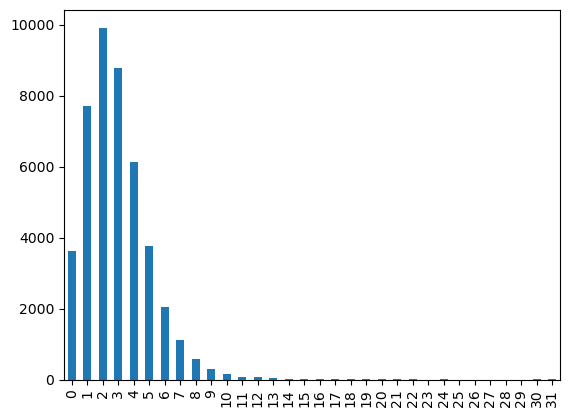

In [7]:
pd.Series(dict_goals).plot(kind="bar")

### Can we model this data using poisson distribution?

**Discussion**

What is the average number of goals?

In [11]:
total_number_goals = df["total_goals"].sum()
total_number_matches = len(df)

mean = total_number_goals/total_number_matches
print(mean)

2.9193515658467297


We can treat the above average as lambda or rate term

**Discussion**

Using this Poisson Distribution, predict the probability of the next match having exactly 6 goals. Compare it with the actual data says.

In [12]:
import scipy
print("Prediction using Poisson: ",scipy.stats.poisson.pmf(6,2.919))
print("Actual Data : ",dict_goals[6]/len(df))

Prediction using Poisson:  0.04638381659916773
Actual Data :  0.046084819516154486


**DIY**

In a match between Scotland and England, what are the chances of a match having upto 3 goals.

**DIY**

For macthes that take place in Glasgow, what are the chances of seeing a match where more than 4 goals are scored

### Car Accessories Case Study [Optional]

In [16]:
url = "https://raw.githubusercontent.com/Gunnvant/Self-Paced-Content/main/python/live_sessions/stats_decision_making/notebooks/car_access.csv"
df = pd.read_csv(url)

In [17]:
df.head(2)

,Title,Price,Number reviews,Real price,Free days,Shipment,Delivery Date,How many time in past month,Stock update
0,Dorman 955-167 Driver Side Power Door Mirror f...,35,101,$1.92,90 days FREE. Terms apply.,Yes,"Mon, Jun 19",50+ bought in past week,Only 7 left in stock - order soon.
1,CURT 51323 Quick Plug Electric Trailer Brake C...,19,386,$1.93,90 days FREE. Terms apply.,Yes,"Mon, Jun 19",50+ bought in past week,Only 4 left in stock (more on the way).


**DIY**

- Find out what are the chances of having an item for delievery whose price is more than \$2?
- For a random sample of 10 deliveries on a Jun 19, what are the chances that upto 6 deliveries will have an item whose price is more than \$2?
- Repeat the excercise of a June 20 and June 22?

